### Imports:

In [1]:
import numpy as np
import random
import data_generation
import high_precision_lr as opt
import low_precision_lr as lp
import precision_util as p_util
import naive_low_precision_lr as naive

%matplotlib inline
import matplotlib.pyplot as plt

### Generating Data:
* n: number of data points
* d: number of dimensions
* s: scale factor for data (x)
* w: generated true weights (floating points range between -1 and 1)
* x: generated data (x - n by d) (int8 representation with s scale factor)
* y: generated labels for each x data point (floating point) - w*x^T
* xt: ignore this, just extra output from generation
* x_fp: full precision representation of x (floating point)

In [2]:
#n = 100000
n = 1000
d=20
s = 1/128.0
w,x,y,xt = data_generation.generate_data_low_precision_linear_regression(d,n,s)
x_fp = p_util.low_precision_to_float(x,s)

### Running normal SGD

In [17]:
weights_sgd = opt.sgd(0.01, x_fp, y, 10000)
loss_sgd = opt.loss(weights_sgd, x_fp, y)
print("Loss for SGD: " + str(loss_sgd))

Loss for SGD: 2.27474666226e-11


### Running normal SVRG

In [19]:
weights_svrg, time_array, loss_array = opt.svrg(0.01, x_fp, y, 10, 2*n, calc_loss=True)
loss_svrg = opt.loss(weights_svrg, x_fp, y)
print("Loss for Full Precision SVRG: " + str(loss_svrg))

Loss for Full Precision SVRG: 7.51431860665e-19


#### Plotting Time

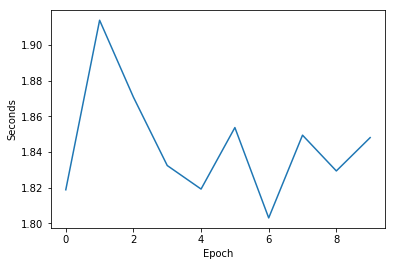

In [10]:
plt.plot(time_array)
plt.ylabel('Seconds')
plt.xlabel('Epoch')
plt.show()

#### Plotting Training Loss

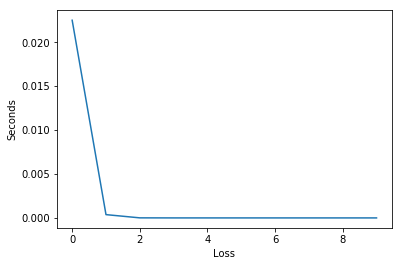

In [20]:
plt.plot(loss_array)
plt.ylabel('Seconds')
plt.xlabel('Loss')
plt.show()

### Running Naive LP SVRG

In [3]:
weights_slow_lp_svrg, time_slow_array, loss_slow_array = naive.lp_svrg_lr(0.01, x_fp, y, 10)
loss_slow_svrg = opt.loss(weights_slow_lp_svrg, x_fp, y)
print(loss_slow_svrg)

6.29504781765e-05


#### Plotting Time

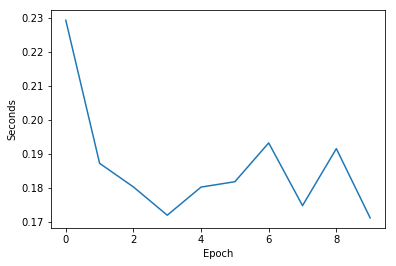

In [22]:
plt.plot(time_slow_array)
plt.ylabel('Seconds')
plt.xlabel('Epoch')
plt.show()

#### Plotting Error

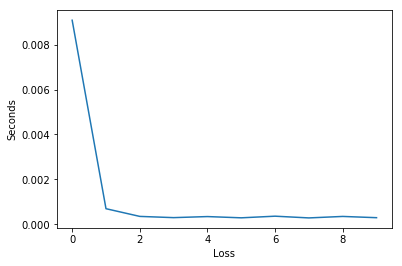

In [23]:
plt.plot(loss_slow_array)
plt.ylabel('Seconds')
plt.xlabel('Loss')
plt.show()

### LP-SVRG - Algorithm 3

In [3]:
weights_svrg_lp, time_array_lp, loss_array_lp = lp.svrg(0.01, x, y, 4, 2*n, calc_loss=True)
loss_svrg_lp = opt.loss(weights_svrg_lp, x_fp, y)
print(loss_svrg_lp)

low p:
[-25 -55  -2  -2 -15 -39  -1 -53  20  56  12  -6  51 -33  11  13  19  17
 -32  23]
high p:
[ -7.62939453e-04  -1.67846680e-03  -6.10351562e-05  -6.10351562e-05
  -4.57763672e-04  -1.19018555e-03  -3.05175781e-05  -1.61743164e-03
   6.10351562e-04   1.70898438e-03   3.66210938e-04  -1.83105469e-04
   1.55639648e-03  -1.00708008e-03   3.35693359e-04   3.96728516e-04
   5.79833984e-04   5.18798828e-04  -9.76562500e-04   7.01904297e-04]
low p:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
high p:
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
low p:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
high p:
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
low p:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
high p:
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
low p:
[ 12 -38  -5 -49 -14 -54  42  -2 -49 -45  29  57  -1 -40 -42 -39  25   6
  -9  44]
high p:
[  3.66210938e-04  -1.15966797e-03  -1

low p:
[-58  56 -23 -50 -53  -8 -40  56 -49  11  32 -21  37 -33  14  13 -48   5
  38  -4]
high p:
[-0.00177002  0.00170898 -0.0007019  -0.00152588 -0.00161743 -0.00024414
 -0.0012207   0.00170898 -0.00149536  0.00033569  0.00097656 -0.00064087
  0.00112915 -0.00100708  0.00042725  0.00039673 -0.00146484  0.00015259
  0.00115967 -0.00012207]
low p:
[ 28  29 -40 -13 -54  51  52 -46 -50  56 -30 -45   6  18  31   8 -10 -41
  16 -22]
high p:
[ 0.00085449  0.00088501 -0.0012207  -0.00039673 -0.00164795  0.0015564
  0.00158691 -0.00140381 -0.00152588  0.00170898 -0.00091553 -0.00137329
  0.00018311  0.00054932  0.00094604  0.00024414 -0.00030518 -0.00125122
  0.00048828 -0.00067139]
low p:
[-22 -15 -19   1 -35  51  22   8  41  -7   5 -43 -27  50  -7  52 -45 -36
 -13  28]
high p:
[ -6.71386719e-04  -4.57763672e-04  -5.79833984e-04   3.05175781e-05
  -1.06811523e-03   1.55639648e-03   6.71386719e-04   2.44140625e-04
   1.25122070e-03  -2.13623047e-04   1.52587891e-04  -1.31225586e-03
  -8.23974

In [5]:
weights_svrg_lp

array([-0.95129395, -1.        , -1.        , -1.        ,  0.99996948,
       -0.98239136,  0.96795654,  0.93865967, -1.        , -1.        ,
       -1.        ,  0.99996948,  0.96899414,  0.99932861,  0.99996948,
       -0.97424316,  0.99996948,  0.99996948, -1.        , -0.99252319])

#### Plotting Time

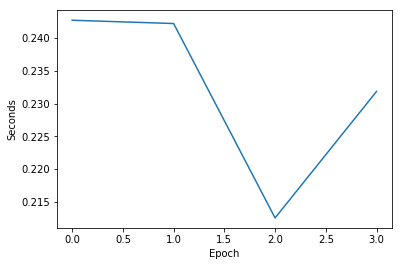

In [6]:
plt.plot(time_array_lp)
plt.ylabel('Seconds')
plt.xlabel('Epoch')
plt.show()

#### Plotting Error

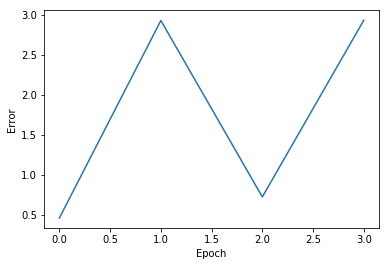

In [7]:
plt.plot(loss_array_lp)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

In [7]:
weights_svrg_lp

array([  4.57763672e-04,  -9.99694824e-01,  -9.99694824e-01,
        -9.99694824e-01,  -9.99694824e-01,  -9.99694824e-01,
        -9.99694824e-01,  -9.99694824e-01,  -9.99694824e-01,
        -9.99694824e-01,  -9.99694824e-01,  -9.99694824e-01,
        -9.99694824e-01,  -9.99694824e-01,  -9.99694824e-01,
        -9.99694824e-01,  -9.99694824e-01,  -9.99694824e-01,
        -9.99694824e-01,  -9.99694824e-01])

In [52]:
loss_array_lp

[1.7577854817064429,
 1.757696806545441,
 1.7576081340410064,
 1.757519464193164,
 1.7574307970019827,
 1.7573421324673715,
 1.757253470589401,
 1.7571648113680596,
 1.757076154803308,
 1.7569875008951723]

# Testing Code

In [25]:
def gradient(wi, xi, sx, sw, yi):
    dp = np.dot(wi.astype(np.int32), xi.astype(np.int32)) # converts to int32
    return 2.0*(float(dp)*sx*sw - yi) # scales back to float and subtracts

def gradient_full(wi, xi, yi):
    return 2.0*xi*(np.dot(wi, xi) - yi) # full gradient calculation


def quantize(vec, s, qtype, vmin, vmax):
    vec = vec / s # need to truncate decimal portion and we will have quantization
    vec2 = np.zeros(len(vec), dtype=qtype)
    for i in range(len(vec)):
        if vec[i] > vmax:
            vec2[i] = qtype(vmax)
        elif vec[i] < vmin:
            vec2[i] = qtype(vmin)
        else:
            vec2[i] = qtype(vec[i])
            #if np.random.rand() > vec[i]%1 and vec2[i] < vmax:
            #    vec2[i]+=1
    return vec2

# quantizes scalar
def quantize_n(n, s, qtype, vmin, vmax):
    n = n / s
    if n > vmax:
        return qtype(vmax)
    elif n < vmin:
        return qtype(vmin)
    else:
        n2 = qtype(n)
        #if np.random.rand() > n%1 and n2 < vmax:
        #   return n2+1
    return n2

def loss(w_hat, x, y):
    n,d = np.shape(x)
    loss = 0
    for i in range(n):
        xi = x[i, :]
        loss += (y[i] - (np.dot(xi.T,w_hat)))**2
    loss = loss/(1.0*n)
    return loss

In [41]:
def svrg(alpha, x, y, K, T, calc_loss = False):
    time_array = []; loss_array = []; n,d = np.shape(x)
    w = np.array(np.random.rand(d)*500, dtype=np.int16)
    sb = 1/((1.0*(2**15))); sr = 1/128.0; sg = sb; sp = sg/sr
    bb = 16; br = 8; bp = 8; bg = 16
    for k in range(K):
        mu_tilde = np.zeros(d)
        for i in range(n):
            xi = x[i, :]
            grd = gradient(w, xi, sr, sb, y[i])*xi.astype(float)*sr
            mu_tilde += grd
        mu_tilde = quantize(alpha*mu_tilde/(1.0*n), sg, np.int16, -32768, 32767)
        mu_tilde_full = mu_tilde.astype(float)*sg
        w_full = w.astype(float)*sb
        w_full = w_full - mu_tilde_full
        w = quantize(w_full, sb, np.int16, -32768, 32767)
        if (calc_loss):
            loss_array.append(loss(w.astype(float)*sb, x.astype(float)*sr, y.astype(float)))
    return w.astype(float)*sb, loss_array

In [ ]:
def svrg2(alpha, x, y, K, T, calc_loss = False):
    time_array = []; loss_array = []; n,d = np.shape(x)
    w = np.array(np.random.rand(d)*500, dtype=np.int16)
    sb = 1/(2.0*128.0*128.0); sr = 1/128.0; sg = sb; sp = sg/sr
    bb = 16; br = 8; bp = 8; bg = 16
    for k in range(K):
        mu_tilde = np.zeros(d)
        for i in range(n):
            xi = x[i, :]
            grd = gradient(w, xi, sr, sb, y[i])*xi.astype(float)*sr
            mu_tilde += grd
        mu_tilde = quantize(alpha*mu_tilde/(1.0*n), sg, np.int16, -32768, 32767)
        mu_tilde_full = mu_tilde.astype(float)*sg
        w_full = w.astype(float)*sb
        w_full = w_full - mu_tilde_full
        w = quantize(w_full, 16, np.int16, -32768, 32767)
        if (calc_loss):
            loss_array.append(loss(w.astype(float)*sb, x.astype(float)*sr, y.astype(float)))
    return w.astype(float)*sb, loss_array

In [68]:
weights_temp, loss_temp = svrg(0.1, x, y, 400, 0, calc_loss = True)

In [69]:
opt.loss(weights_temp, x_fp, y)

1.4979808560178438e-05

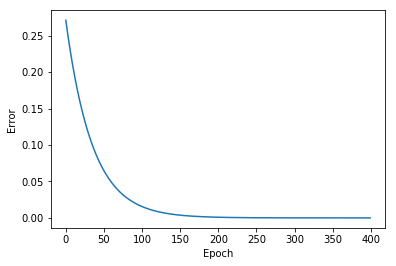

In [70]:
plt.plot(loss_temp)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()